In [58]:
from furlib import *

**1.** El sistema de referencia {B} está trasladado 5 unidades en X, 4 unidades en Y y -10 unidades en
Z con respecto al sistema {A}. Se sabe que las coordenadas de un punto P descritas en el sistema
{B} son $P^B = [2, 3,−5]^T$, calcule $P^A$.

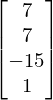

In [59]:
PB = Matrix([2,3,-5,1])
HBA = htmt(5,4,-10)
PA = HBA*PB
PA

<hr>

**2.** Muestre que la distancia entre dos puntos no cambia con la rotación, es decir, que 
$\lVert \vec{p_1} - \vec{p_2} \rVert = \lVert R\vec{p_1} - R\vec{p_2}  \rVert$

In [60]:
# Sean p1 y p2:
a,b,c,d,e,f,phi = symbols('a,b,c,d,e,f,phi', real=true)
p1 = Matrix([a,b,c])
p2 = Matrix([d,e,f])

# Sea R una matriz de rotación resultante de un giro alrededor de "z" un ángulo "phi"
R = htmr(phi,"z")[:3,:3]

# Luego ||p1 - p2||
#expand((p1-p2)[0]**2 + (p1-p2)[1]**2 + (p1-p2)[2]**2)
expand((p1-p2).norm())

In [61]:
# Para el caso de ||Rp1 - Rp2||
simplify((R*p1-R*p2).norm())

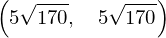

In [62]:
## Un ejemplo numérico
p1,p2 = randMatrix(3,1), randMatrix(3,1) # Random points
(p1-p2).norm(), simplify((R*p1 - R*p2).norm())

<hr>

**3.** Un vector $\vec{P}^{uvw}$ se rota alrededor del eje $w$ un ángulo $\theta$ y enseguida se rota 
alrededor del eje $u$ un ángulo $\phi$. Calcule la MTH que realiza las transformaciones en el orden indicado.


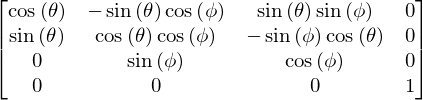

In [63]:
theta = symbols('\\theta')
htmr(theta,"z")*htmr(phi,"x")

<hr>

**4. Rotación global y local de un cubo.** La figura muestra la posición inicial de un cubo con un punto 
fijo en $D$ y aristas de longitud $l=1$. Calcule:

a) Las coordenadas de las esquinas después de una rotación de 30° alrededor del eje $x$, seguida por 
una rotación de 30° alrededor del eje $X$.

b) Las coordenadas de las esquinas después de una rotación de 30° alrededor del eje $y$, seguida por 
una rotación de 30° alrededor del eje $X$.

c) Las coordenadas de las esquinas después de la rotación de 30° alrededor del ej $x$, seguida por 
una rotación de 30° alrededor del eje $x$ y posteriormente una rotación de 30° alrededor del eje $x$.

d) Las coordenadas de las esquinas después de una rotación de 30° alrededor del eje $x$, seguida por 
una rotación de 30° alrededor de $Y$ y finalmente una rotación de 30° alrededor del eje $z$.

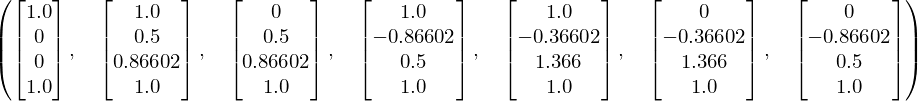

In [81]:
# Puntos en coordenadas locales
A = Matrix([1,0,0,1])
B = Matrix([1,1,0,1])
C = Matrix([0,1,0,1])
E = Matrix([1,0,1,1])
F = Matrix([1,1,1,1])
G = Matrix([0,1,1,1])
H = Matrix([0,0,1,1])

# Para a)
HA = (htmr(pi/6,"x")*htmr(pi/6,"x")).evalf(5)
HA*A, HA*B, HA*C, HA*E, HA*F, HA*G, HA*H

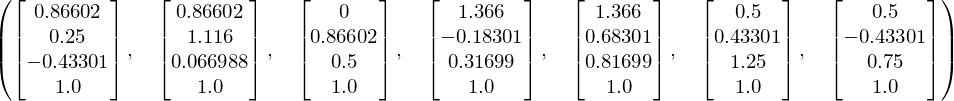

In [82]:
# Para b)
HB = ( htmr(pi/6,"x")*htmr(pi/6,"y") ).evalf(5)
HB*A, HB*B, HB*C, HB*E, HB*F, HB*G, HB*H

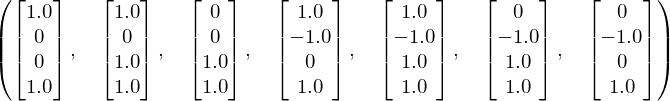

In [83]:
# Para c)
HC = ( htmr(pi/2,"x") ).evalf(5)
HC*A, HC*B, HC*C, HC*E, HC*F, HC*G, HC*H

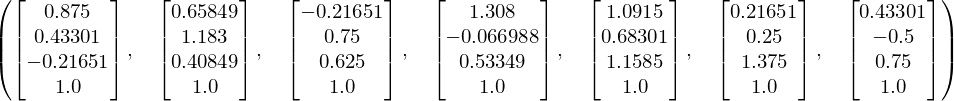

In [84]:
# Para d)
HD = ( htmr(pi/6,"y")*htmr(pi/6,"x")*htmr(pi/6,"z") ).evalf(5)
HD*A, HD*B, HD*C, HD*E, HD*F, HD*G, HD*H

**5.** Suponga que tres sistemas de referencia $o_1 x_1 y_1 z_1$, $o_2 x_2 y_2 z_2$ y $o_3 x_3 y_3 z_3$ están 
dados y que además:

$$
R_2^1 = \begin{bmatrix}
1 & 0 & 0 \\
0 & \frac{1}{2} & \frac{-\sqrt{3}}{2} \\
0 &  \frac{\sqrt{3}}{2} &  \frac{1}{2} \\
\end{bmatrix}
\quad ; \quad
R_3^1 = \begin{bmatrix}
0 & 0 & -1 \\
0 & 1 & 0 \\
1 & 0 & 0 \\
\end{bmatrix}
$$

Calcule $R_3^2$.

Se sabe que $R_3^1 = R_2^1 R_3^2 $, entonces $R_3^2 = (R_2^1)^{-1} R_3^1 $


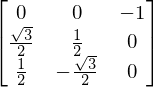

In [91]:
R21 = htmr(pi/3,'X')[:3,:3]
R31 = htmr(-pi/2,"y")[:3,:3]

R21.inv()*R31

<hr>

**6.** Muestre que para una matriz de rotación se cumple la propiedad $R^{-1} = R^T $. Utilice la matriz de rotación alrededor 
de $x$ para comprobarlo. Suponga un ángulo $\theta$ de rotación y proceda mediante un método convencional para el cálculo de 
la matriz inversa y compare con lo obtenido transponiendo la matriz de rotación.


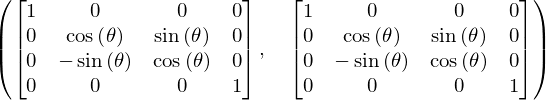

In [93]:
R = htmr(theta,'x')
R.T, simplify(R.inv())

<hr>
**7.** Calcule la matriz de rotación correspondiente al conjunto de ángulos de Euler \{ $\pi/2$, $\pi/3$, $\pi/4$ \}. 
¿Cuál es la dirección del eje $x_1$ respecto al sistema base?. 

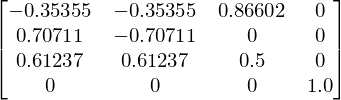

In [100]:
(htmr(pi/2,"z")*htmr(pi/3,"x")*htmr(pi/4,"z")).evalf(5)

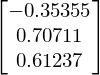

In [101]:
# Dirección del eje x1
_[:3,0]

<hr>
**8.** Calcule la matriz de rotación correspondiente al conjunto de ángulos de Euler ZYZ.

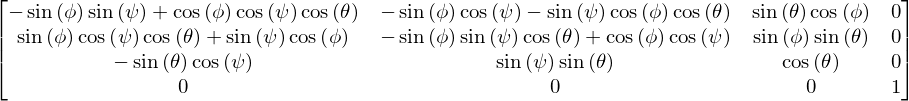

In [102]:
phi,theta,psi = symbols('\\phi,\\theta,\\psi')
htmr(phi,'z')*htmr(theta,'y')*htmr(psi,'z')

<hr>
**9.** Calcule la matriz de transformación homogénea que representa una traslación de 3 unidades 
a lo largo del eje $x$ seguida por una rotación de $\frac{\pi}{2}$ alrededor del eje $z$ actual 
seguida por una traslación de 1 unidad a lo largo del eje $y$ fijo. Esquematice el sistema 
de referencia resultante.

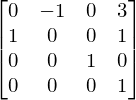

In [103]:
htmt(0,1,0)*htmt(3,0,0)*htmr(pi/2,"z")

<hr>
**10.** Calcule la matriz de rotación que representa un *roll* de $\pi/4$ seguido por un 
*yaw* de $\pi/2$ y finalmente por un *pitch* de $\pi/2$

**11.** La siguiente matriz de transformación homogénea se obtiene de realizar una rotación alrededor de $w$ seguida por 
una traslación en el plano $uv$.

$$
T = \begin{bmatrix} 0.7071 & -0.7071 & 0 & 3.536\\0.7071 & 0.7071 & 0 & 10.61\\0 & 0 & 1.0 & 0\\0 & 0 & 0 & 1.0 \end{bmatrix}
$$

Determine el ángulo que se ha rotado, así como las componentes de traslación correspondientes.

**12.** Sea $H$ una matriz de transformación homogénea de la forma:

$$ H = \begin{bmatrix}
\vec{R} & \vec{d} \\
\vec{0} & 1 \\
\end{bmatrix} $$

Entonces su inversa viene dada por:

$$ H^{-1} = \begin{bmatrix}
\vec{R}^T & -\vec{R}^T\vec{d} \\
\vec{0} & 1 \\
\end{bmatrix} $$

Compruebe lo anterior utilizando un ejemplo demostrativo.

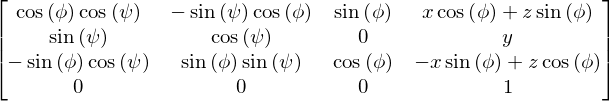

In [112]:
# Sea H
H = htmr(phi,'y')*htmt(x,y,z)*htmr(psi)
H

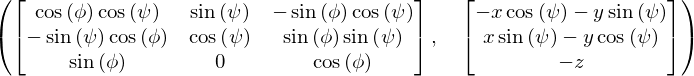

In [113]:
# Con fórmula
(H[:3,:3]).T, -simplify(((H[:3,:3]).T)*H[:3,3])

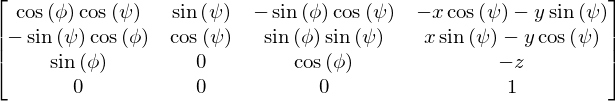

In [114]:
# Inversa
simplify(H.inv())

**13.** Para el conjunto de sistemas de referencia mostrados en la figura calcule: $T_1^0, T_2^0, T_2^1, T_0^1$.

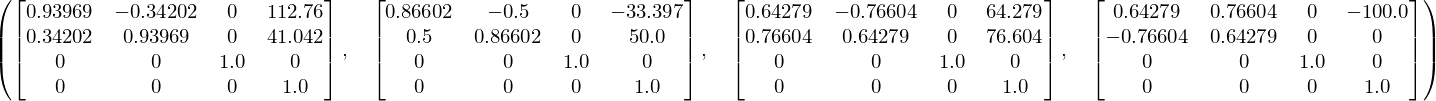

In [118]:
t1 = 20*pi/180
t2 = 30*pi/180
T10 = htmr(t1)*htmt(120,0,0)
T20 = htmr(t1+t2)*htmt(100,0,0)
# T20 = T10*T21  ->  T21 = (T10)^{-1} T20
T21 = T10.inv()*T20
T02 = T20.inv()
T10.evalf(5), T21.evalf(5), T20.evalf(5), T02.evalf(5)